In [1]:
import os
if os.getcwd().endswith('visualization'):
    os.chdir('..')

from IPython.display import display, Markdown

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import confusion_matrix

In [2]:
def custom_confusion_matrix(title, threshold, predict_proba_file):
    """
    Display a confusion Matrix.
    :param title: Title to display for the report.
    :param threshold: Threshold to use for prediction
    :param predict_proba_file: File Containing Class Prediction Probabilities
    :return: 
    """
    display(Markdown('## %s' % title))
    with open(predict_proba_file, 'rb') as file:
        frame = pickle.load(file)
        y_test = frame.y_actual
        y_test_predict = (frame.y_predict[:, 1] >= threshold).astype(float)
        display(Markdown('#### Confusion Matrix'))
        matrix = confusion_matrix(y_test, y_test_predict)

        plt.figure(figsize=(4,4))
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

        color_mid = matrix.max() / 2.
        for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
            plt.text(j, i, matrix[i, j], fontsize=10,
                     horizontalalignment="center",
                     verticalalignment='center',
                     color="white" if matrix[i, j] > color_mid else "black")

        ticks = np.arange(len(np.unique(y_test)))
        classes = np.unique(y_test)
        plt.xticks(ticks, ['No Arrest', 'Arrest'])
        plt.yticks(ticks, ['No Arrest', 'Arrest'])
        plt.ylabel('True Class', fontsize=20, rotation=0)
        plt.xlabel('Predicted Class', fontsize=20)
        plt.show()

## Neural Network

#### Confusion Matrix

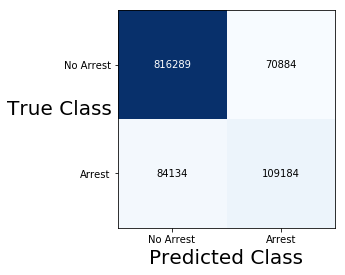

In [3]:
custom_confusion_matrix('Neural Network', 0.316, 'model/output/neural_network_basic_predict_proba.p')

## Neural Network With Feature Selection

#### Confusion Matrix

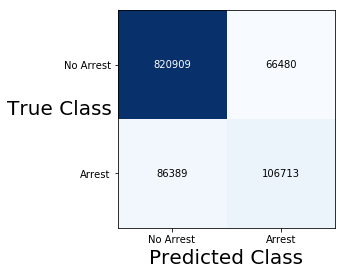

In [4]:
custom_confusion_matrix('Neural Network With Feature Selection', 0.302, 'model/output/neural_network_basic_fs_predict_proba.p')

## XGBoost

#### Confusion Matrix

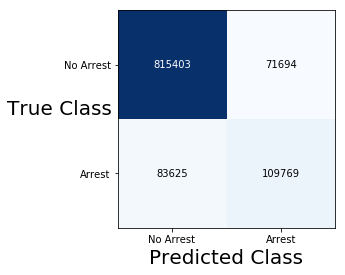

In [5]:
custom_confusion_matrix('XGBoost', 0.298, 'model/output/xgboost_basic_predict_proba.p')

## XGBoost with Feature Selection

#### Confusion Matrix

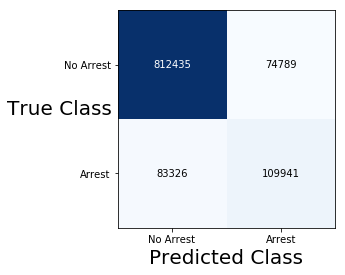

In [6]:
custom_confusion_matrix('XGBoost with Feature Selection', 0.290, 'model/output/xgboost_basic_fs_predict_proba.p')

## Stochastic Gradient Descent

#### Confusion Matrix

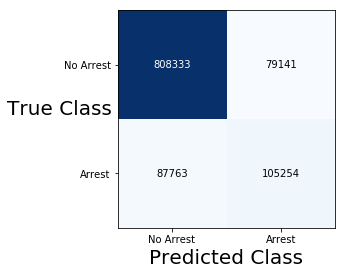

In [7]:
custom_confusion_matrix('Stochastic Gradient Descent', 0.273, 'model/output/sgd_huber_loss_over_sampled_predict_proba.p')

## Stochastic Gradient Descent With Feature Selection

#### Confusion Matrix

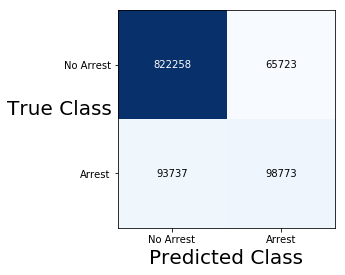

In [8]:
custom_confusion_matrix('Stochastic Gradient Descent With Feature Selection', 0.320, 'model/output/sgd_huber_loss_over_sampled_fs_predict_proba.p')